In [1]:
# Importing the necessary module!

import numpy as np
import pandas as pd

In [2]:
# Importing data

df = pd.read_csv("/content/golf-dataset.csv")
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [3]:
df.head()

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [4]:
df.dtypes


Outlook      object
Temp         object
Humidity     object
Windy          bool
Play Golf    object
dtype: object

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Outlook    14 non-null     object
 1   Temp       14 non-null     object
 2   Humidity   14 non-null     object
 3   Windy      14 non-null     bool  
 4   Play Golf  14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


In [51]:
#Convert categorical variable into dummy/indicator variables or (binary vairbles) essentialy 1's and 0's
# I chose the variable name one_hot_data bescause in ML one-hot is a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0)
hot_data = pd.get_dummies(golf_df[ ['Outlook', 'Temperature', 'Humidity', 'Windy'] ])
#print the new dummy data
hot_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [52]:
# The decision tree classifier.
clf = tree.DecisionTreeClassifier()
# Training the Decision Tree
clf_train = clf.fit(one_hot_data, golf_df['Play'])

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[0] <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]"] ;
1 [label="X[7] <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[2] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]"] ;
1 -> 2 ;
3 [label="X[8] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
2 -> 6 ;
7 [label="X[8] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]"] ;
1 -> 7 ;
8 [label="X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
7 -> 8 ;
9 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
8 -> 9 ;
10 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
8 -> 10 ;
11 [label="gini = 0.0\nsamples = 3\nvalue = [0, 3]"] ;
7 -> 11 ;
12 [label="gini = 0.0\nsam

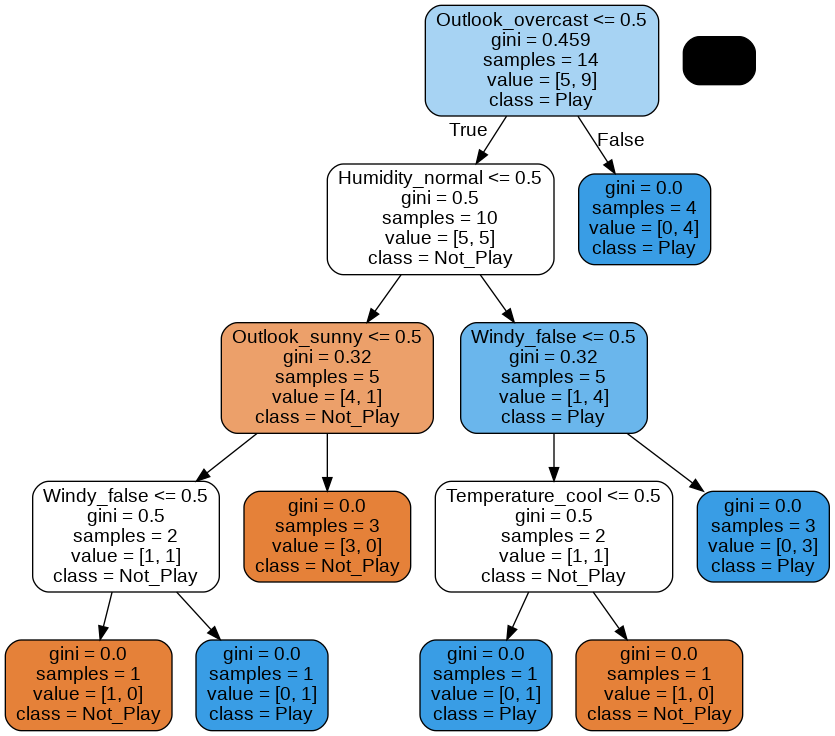

In [53]:
# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(clf_train, None))

#Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# **Prediction**

In [54]:
# Test model prediction input:
# Outlook = sunny,Temperature =  hot, Humidity = normal, Windy = false
prediction = clf_train.predict([[0,0,1,0,1,0,0,1,1,0]])
prediction

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['yes'], dtype=object)

In [62]:
prediction = clf_train.predict([[1,1,1,1,1,1,1,1,1,1]])
print(prediction)

['yes']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
